In [2]:
#PCA
import numpy as np
from sklearn.decomposition import PCA

In [5]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [6]:
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [7]:
print(pca.components_.shape)

(50, 10000)


In [11]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr) # n은 샘플 개수 입니다.
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: #n 개까지만 그립니다.
                axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
        axs[i,j].axis('off')
    plt.show()

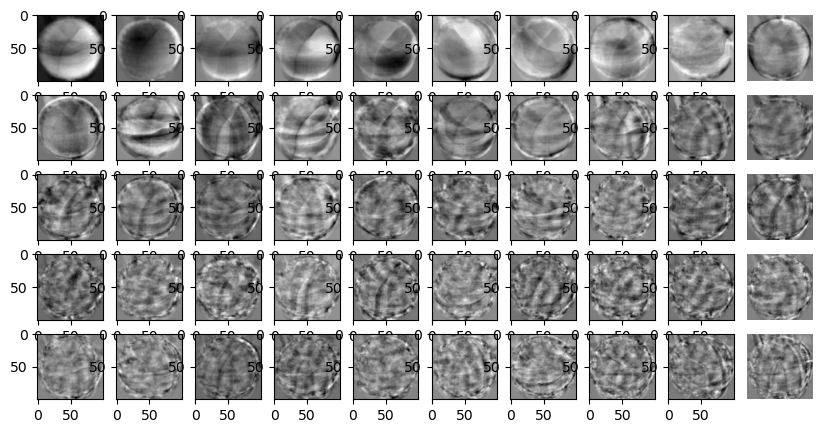

In [12]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [13]:
print(fruits_2d.shape)

(300, 10000)


In [14]:
fruits_pca = pca.transform(fruits_2d)

In [15]:
print(fruits_pca.shape)

(300, 50)


In [16]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [17]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)

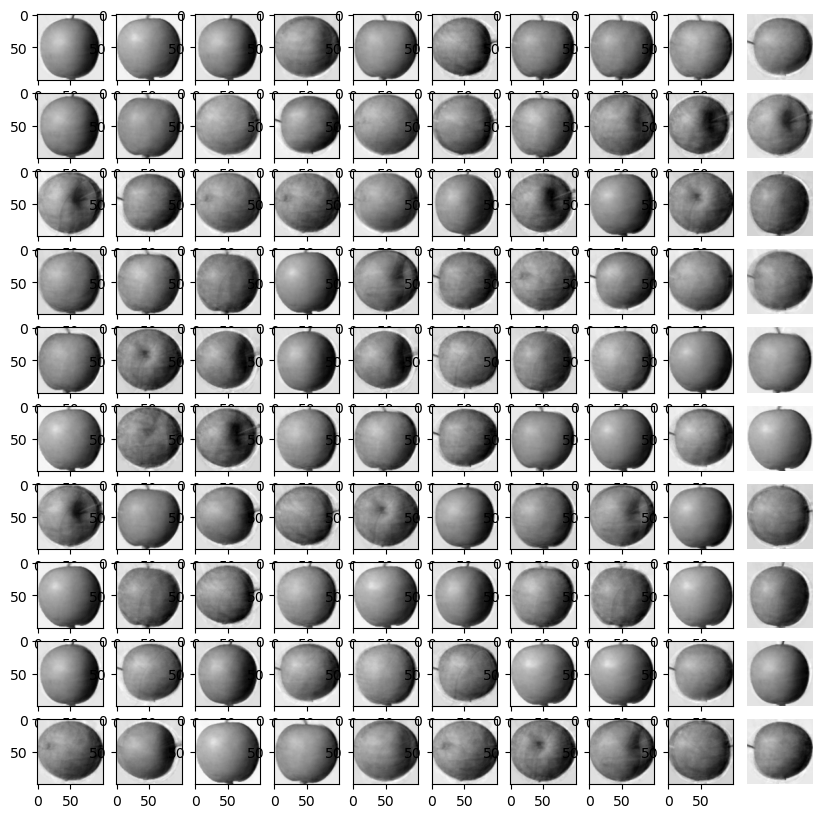

`n


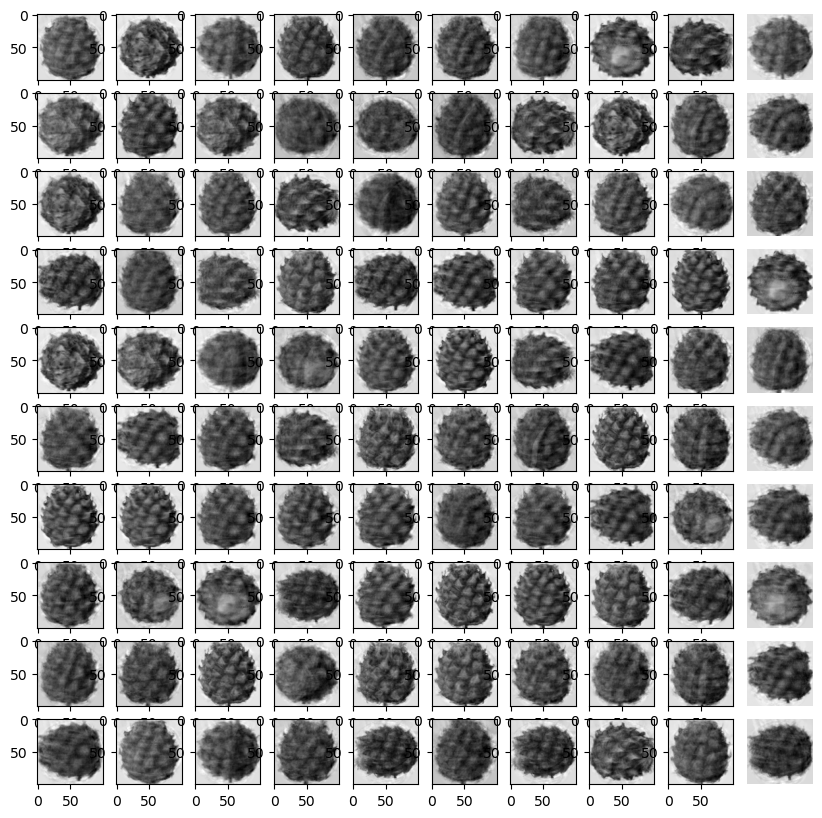

`n


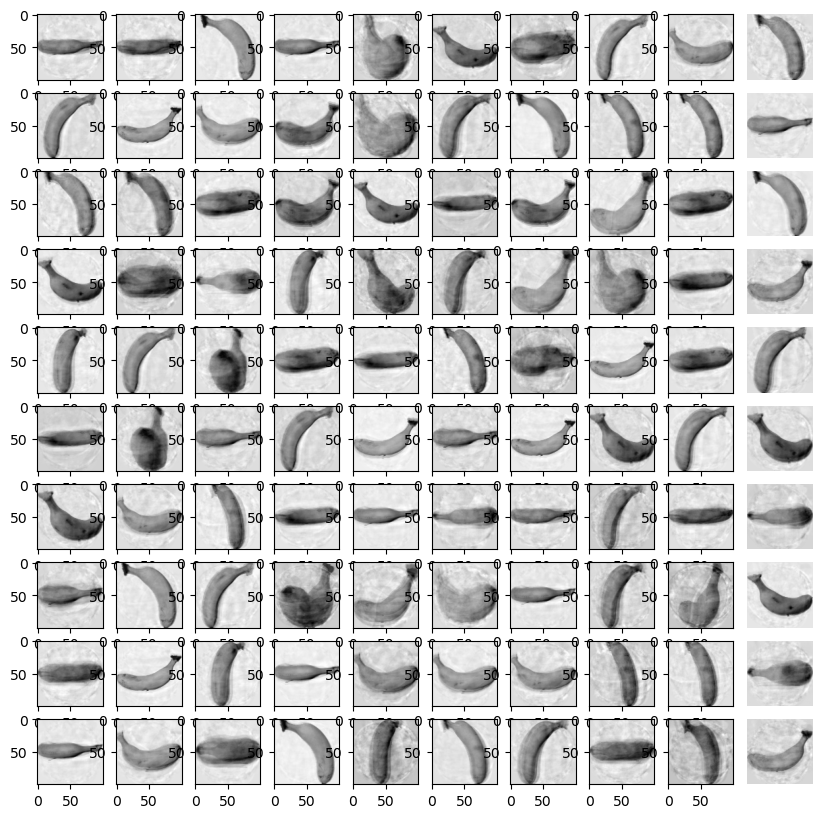

`n


In [18]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("`n")

In [19]:
# explained variance: 분산을 얼마나 잘 나타내는지 기록한 값.
print(np.sum(pca.explained_variance_ratio_))

0.9215491784890166


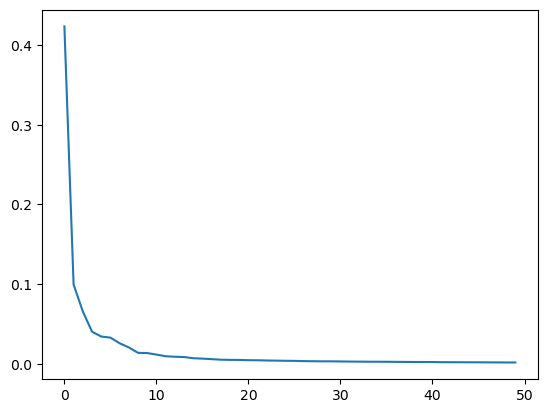

In [20]:
plt.plot(pca.explained_variance_ratio_)

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [23]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.1506641387939453


In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.00590662956237793


In [25]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [26]:
# 주성분이 요소가 2개
print(pca.n_components_)

2


In [27]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [28]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.007767772674560547


/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [30]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


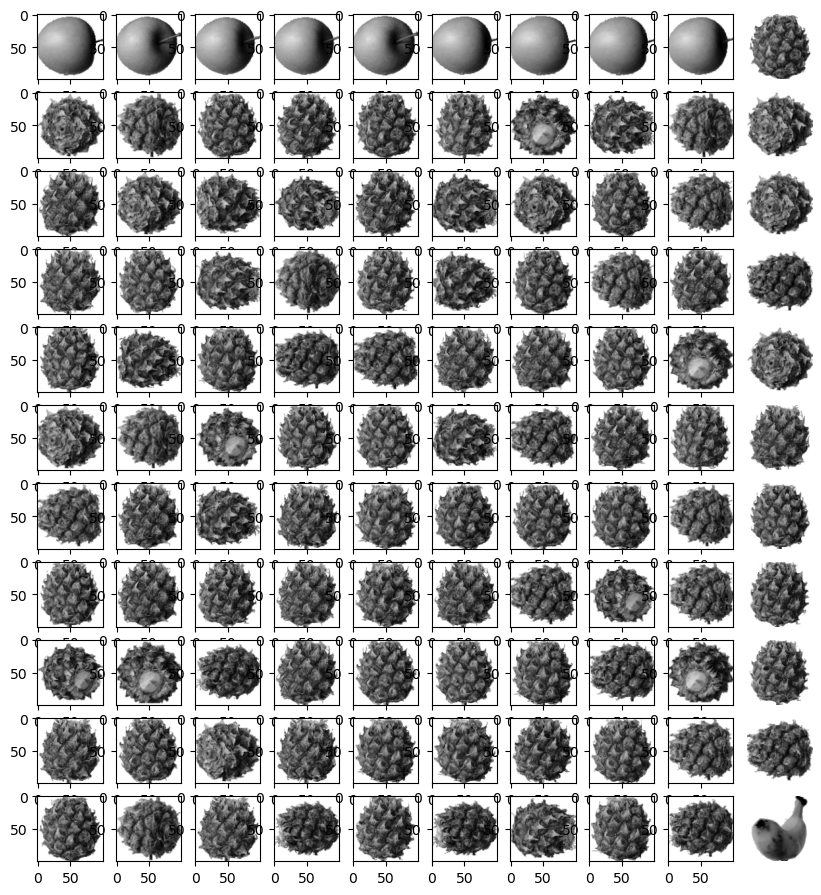

`n


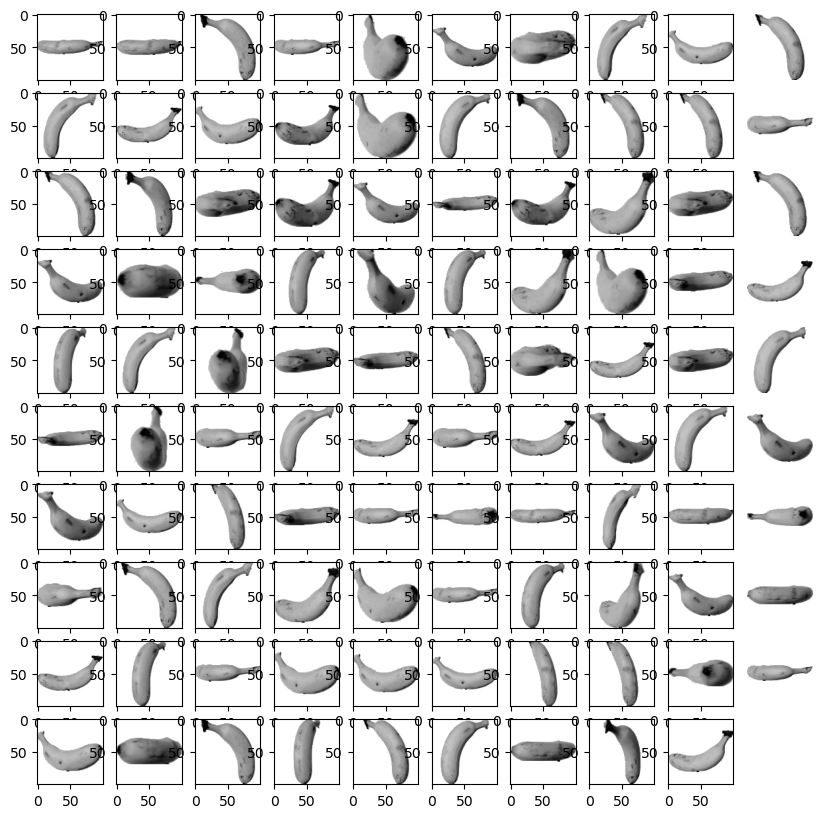

`n


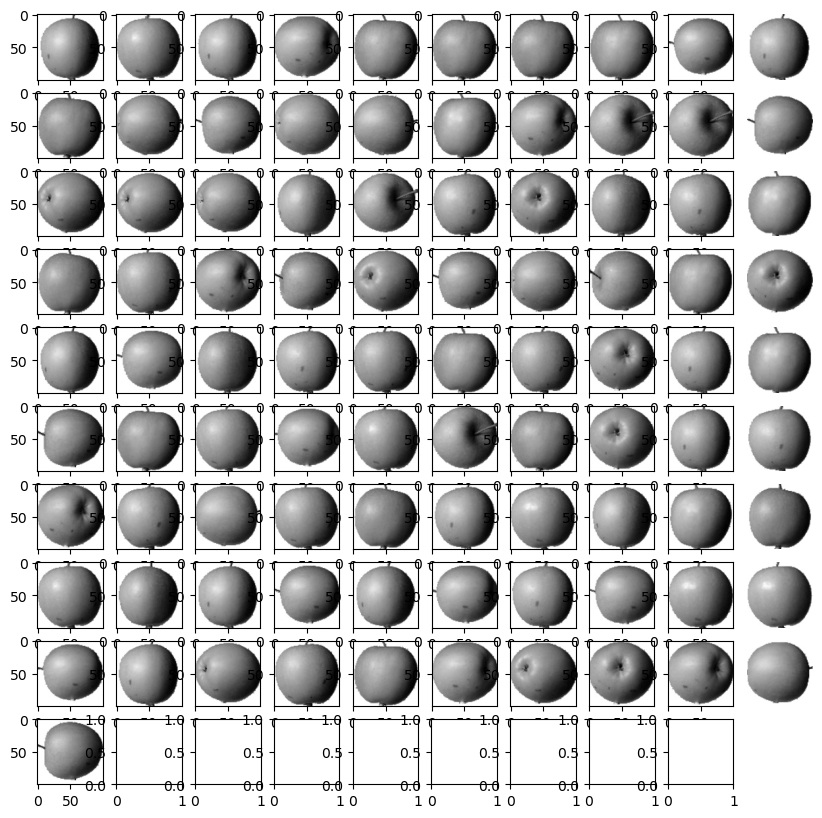

`n


In [31]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("`n")

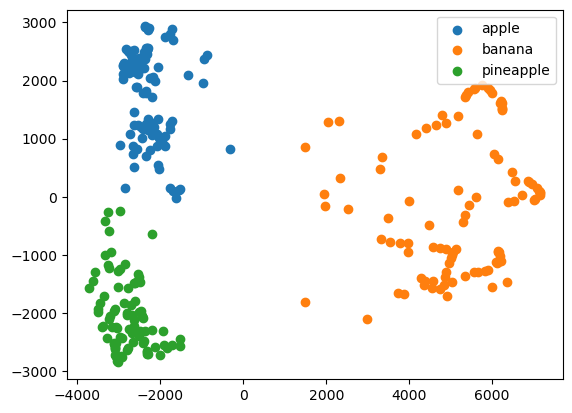

In [32]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()